<a href="https://colab.research.google.com/github/Emanuelle-p/object_detection/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de veículos e reconhecimento de placas (Instruction)**

Integrantes: Adriano Ferreira, Amir Yousself, Artur Matos, Bernardo Aires, Daired Almeida, Daniel Machado, Emanuelle Passos, Marcelo Henrique

#O que é detecção de objetos?




A Detecção de objetos é uma técnica em visão computacional que tem como objetivo detectar instâncias de objetos em imagens ou vídeos. Tipicamente, algoritmos de detecção de objetos empregam machine learning ou deep learning para gerar resultados precisos. Ao observar imagens ou vídeos, os seres humanos são capazes de rapidamente reconhecer e localizar objetos de interesse. A detecção de objetos visa reproduzir essa habilidade usando recursos computacionais.


**Aplicações**

A detecção de objetos é uma tecnologia fundamental por trás dos sistemas avançados de assistência ao motorista (ADAS) que permitem que os carros detectem faixas de condução ou realizem detecção de pedestres para melhorar a segurança nas estradas. A detecção de objetos também é útil em aplicações como sistemas de vigilância por vídeo ou sistemas de recuperação de imagens.

Caso queira se aprofundar mais nos fundamentos de detecção de objetos, segue o [link com mais detalhes sobre o assunto.](https://www.fritz.ai/object-detection/)

## O que é o YOLO e como ele pode ajudar neste caso?



 O **YOLO** é um algoritmo de detecção de objetos e segmentação de imagens.

**Por que esse nome?**

  > YOLO = You Only Look Once ("Você só olha uma vez")
  
Como o nome diz, basta uma simples e rápida "olhada" (em inglês, **"single pass"**) na imagem para que o modelo consiga detectar e localizar na imagem onde está o objeto detectado com alta precisão. Ademais, o algoritmo demarca a localização dele a partir de "Bounding Boxes", isto é, caixas que delimitam a localização do objeto na imagem.



**Como o algoritmo funciona?**


1.   A imagem é dividida em um grid de **Z x Z células**, em que Z pode variar de acordo com as versões do algoritmo.
2.   Predições de **B caixas delimitadoras** ("bounding boxes") são feitas por cada célula, sobre as quais é gerado um grau de confiança sobre o quão certo o algoritmo está de que tal caixa realmente esteja delimitando um objeto. B também pode variar conforme as versões.
3.   Então **a célula prediz uma classe para cada caixa delimitadora**, a partir de um grau de confiança gerado para cada uma das classes, como no caso das caixas delimitadoras.

Desse modo, é feita uma combinação do grau de confiança da caixa delimitadora e da classe gerando uma pontuação final que determina a possibilidade de realmente haver um objeto contido em tal caixa, bem como a sua classe. 

4.   Considera-se um **threshold**, isto é, um limiar, pois devido à grande quantidade de caixas o número de valores referente à pontuação final a se analisar também seria grande, contudo muitas vezes o grau de confiança é baixo, fazendo-se interessante determinar o quão preciso se deseja que o algoritmo seja.




Além disso, o algoritmo utiliza a rede neural profunda **Darknet** para se extrair as características da imagem/vídeo em análise.

**Qual a vantagem do YOLO?**

Frente a outros métodos, por ser um algoritmo "single pass", com uma **"única olhada"** ele já consegue gerar predições acerca da classe do objeto detectado após passar pela rede, tornando a detecção mais rápida.


Além disso, após o seu lançamento por exemplo, o YOLO era capaz rodar até 30 frames por segundo em sua GPU, detectando até 80 categorias de objetos, um marco em questão de memória.

Diante disso, é interessante salientar o reconhecimento do YOLO frente à detecção de objetos, motivo pelo qual ele tem sido adotado neste trabalho para a detecção em vídeos, o que demandaria mais memória e tempo se comparado à detecção em imagens.

Para mais informações sobre o YOLO:

> https://iaexpert.academy/2020/10/13/deteccao-de-objetos-com-yolo-uma-abordagem-moderna/?doing_wp_cron=1681096959.1357550621032714843750#:~:text=Esse%20framework%20foi%20desenvolvido%20pelo,tamb%C3%A9m%20possui%20suporte%20para%20GPU

Já sobre a sua documentação:
> https://docs.ultralytics.com/


# O que é detecção de contornos de objetos?





Um contorno é uma curva fechada que une todos os pontos contínuos com cores ou intensidades semelhantes, eles representam as formas dos objetos encontrados em uma imagem.

Usando a detecção de contornos, podemos detectar as bordas dos objetos e localizá-los facilmente em uma imagem. Muitas vezes, é o primeiro passo para muitas aplicações interessantes, como extração de primeiro plano de imagem, segmentação de imagem simples, reconhecimento ótico de caracteres (OCR), detecção e reconhecimento. 

Para aqueles que queiram aprofundar no assunto, segue o link no qual baseamos a exemplificação que virá a seguir:

> <https://learnopencv.com/contour-detection-using-opencv-python-c/>.


### Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import cv2
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### Funções

Como a função do OpenCV, cv2.imshow(), não funciona no google colab, fizemos uma "gambiarra" utilizando o matplotlib para que a imagem possa ser plotada.

In [ ]:
def plot_image(img):
  # Função para plotar a imagem no coloração correta utilizando o MatplotLib
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
def download_database(url, filename='image.png'):
  # Função para fazer download da base de dados a partir da url
  # Install PyDrive
 
  # Faz a autenticação do google drive
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  
  # Faz o download do arquivo
  downloaded = drive.CreateFile({'id':url.split('/')[-2]})   
  downloaded.GetContentFile(filename) 


### Baixando imagem do Drive

Para que possamos utilizar a mesma imagem, independente da máquina do usuário, utilizamos a função download_database() que recebe um link do drive e baixa o arquivo presente nele.

In [ ]:
# Insira link aqui do drive:
url_image = 'https://drive.google.com/file/d/19-oeq-TvjIepTF2ZZg0l9DPo_5RFTOB6/view?usp=share_link'

In [ ]:
download_database(url_image)

A partir da imagem baixada, criaremos a variável "cars" que a guardará e algumas cópias dela, que serão úteis posteriormente no código.

In [ ]:
cars = cv2.imread("image.png")
cars_copy = cars.copy()
cars_copy2 = cars.copy()

Imagem original:

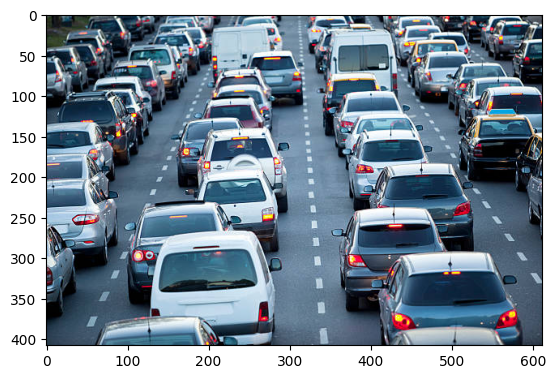

In [ ]:
plot_image(cars)

### Aplicando Filtros

Inicialmente, converteremos a imagens para tons de cinza para facilitar a aplicação do filtro binário (deixar a imagem em preto e branco) que virá em seguida.

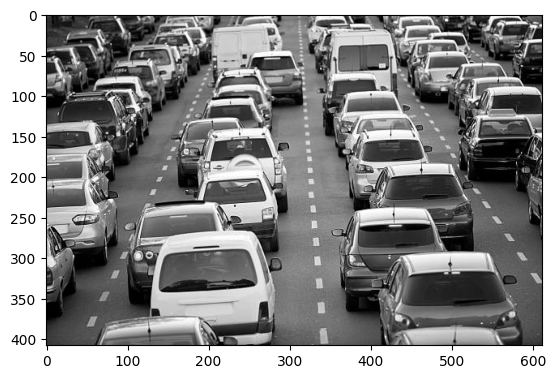

In [ ]:
gray = cv2.cvtColor(cars, cv2.COLOR_BGR2GRAY)
plot_image(gray)

Devido a forma como o algortimo que acha e desenha os contornos funciona, ele se torna mais eficiente com imagens "binarizadas", isto é, possui apenas pixels pretos e brancos. Para isso, existem alguns algoritmos que fazem esse tratamento na imagem, os principais são o Canny e o Thresholding.

Para compreender mais o theresholding, esse link possui um conteúdo teórico interessante: 

> https://learnopencv.com/opencv-threshold-python-cpp/


Agora, para aqueles que buscam saber mais sobre função em si do OpenCV, esta é a documentação oficial: 

> https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


Imagem com Thresholding aplicado:

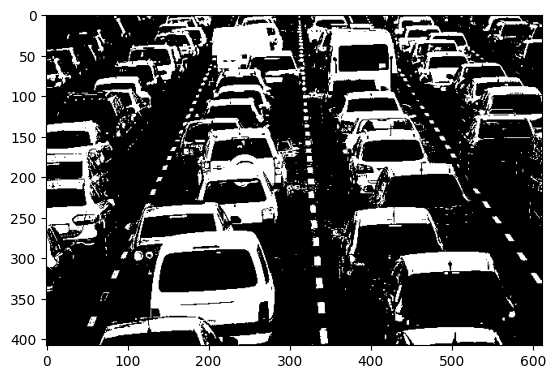

In [ ]:
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
plot_image(thresh)

Do mesmo modo, para compreender mais o Canny e Edges, esse link possui um conteúdo teórico interessante: 

> https://learnopencv.com/edge-detection-using-opencv/


E para aqueles que buscam saber mais sobre função em si do OpenCV, esta é a documentação oficial:

> https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html


Imagem com Canny aplicado:

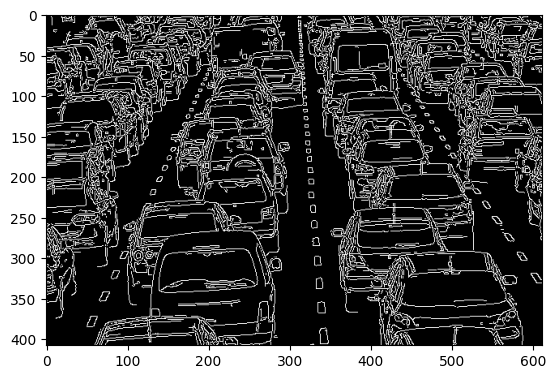

In [ ]:
edges = cv2.Canny(gray, 100, 200)
plot_image(edges)

### Desenhando Contornos

Por fim, basta utilizar a função cv2.findContours() para achar os contornos nas imagens binarizadas juntamente da função cv2.drawContours() para desenhá-los nas imagens originais.

Contornos usando o Thresholding:

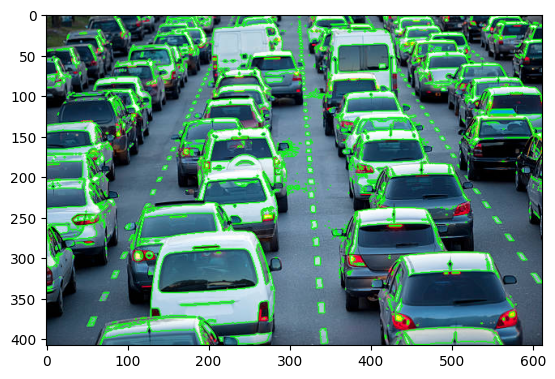

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(cars_copy, contours, -1, (0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
plot_image(cars_copy)

Contornos usando o Canny:

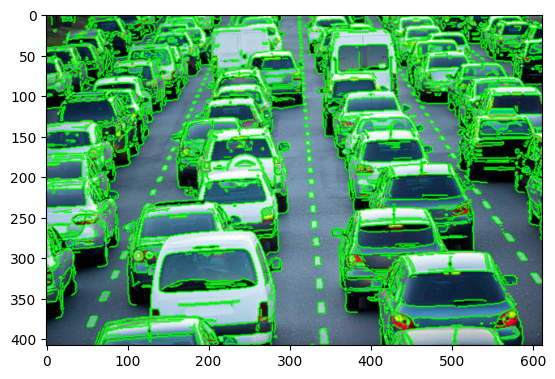

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(cars_copy2, contours, -1, (0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
plot_image(cars_copy2)

#Build Associado - Detecção de Carros

Link do drive dos vídeos de cada modelo que aplicamos a detecção de carros:
> https://drive.google.com/file/d/1UwLkIXzWfiZ2B9gLkGYUxQhEo5f2ISzX/view?usp=share_link

Link do Projeto YOLOv7:
> https://drive.google.com/drive/folders/1FJuZLpqGuWu1k026vbukSn_PHmKXK_Lv?usp=share_link

Baseado no vídeo do TheCodingBug:
https://www.youtube.com/watch?v=K_OGcfXwskc&t=188s&ab_channel=TheCodingBug

Link do tutorial ensinando a usar o código:
> https://drive.google.com/file/d/1fYi6CcpyQajqEU8kzmih0qWHeLit_Col/view?usp=share_link